In [1]:
#!pip install scikit-learn
#import sklearn

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
train_val_df = pd.read_csv('./MNIST/train.csv')
test_df = pd.read_csv('./MNIST/test.csv')

In [4]:
train_val_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
x_train_val_df, y_train_val_df = train_val_df.iloc[:,1:], train_val_df[['label']]
x_train_val_df.head()


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
xtrain_df, xval_df, ytrain_df, yval_df = train_test_split(x_train_val_df, y_train_val_df, train_size = 0.8, shuffle=True)


In [7]:
print(len(xtrain_df), len(ytrain_df), len(xval_df), len(yval_df), len(test_df))

33600 33600 8400 8400 28000


In [8]:
import torch
import torch.nn.functional as F

C:\Users\Admin\Desktop\CNRenv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
labels_dict = {}

for xx in range(10):
    zeros = [0 for _ in range(10)]
    zeros[xx] = 1
    labels_dict[xx] = zeros

print(labels_dict)

{0: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], 1: [0, 1, 0, 0, 0, 0, 0, 0, 0, 0], 2: [0, 0, 1, 0, 0, 0, 0, 0, 0, 0], 3: [0, 0, 0, 1, 0, 0, 0, 0, 0, 0], 4: [0, 0, 0, 0, 1, 0, 0, 0, 0, 0], 5: [0, 0, 0, 0, 0, 1, 0, 0, 0, 0], 6: [0, 0, 0, 0, 0, 0, 1, 0, 0, 0], 7: [0, 0, 0, 0, 0, 0, 0, 1, 0, 0], 8: [0, 0, 0, 0, 0, 0, 0, 0, 1, 0], 9: [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]}


In [10]:
from torch.utils.data import Dataset, DataLoader

class make_dataset(Dataset):
    def __init__(self, x_df, y_df):
        self.x_df = x_df
        self.y_df = y_df
        self.df_len = len(x_df)
    
    def __getitem__(self, idx):
        #sample = self.df.iloc[idx]
        image = self.x_df.iloc[idx]
        label = int(self.y_df.iloc[idx])
        label = torch.FloatTensor(labels_dict[label])
        #print(type(label))
        #print(image.shape, type(image))
        image = image.to_numpy(dtype=np.uint8)
        image = np.reshape(image, (28,28))
        return {'label':label, 'image':image}
    def __len__(self):
        return self.df_len

In [11]:
train_dlo = make_dataset(xtrain_df, ytrain_df)
val_dlo = make_dataset(xval_df, yval_df)
#test_dlo = make_dataset(test_df)
batch_size = 16
train_dataloader = DataLoader(train_dlo, shuffle=False, pin_memory=False, batch_size=batch_size)
val_dataloader = DataLoader(val_dlo, shuffle=False, pin_memory=False, batch_size=batch_size)
#test_dataloader = DataLoader(test_dlo, shuffle=False, pin_memory=False, batch_size=16)


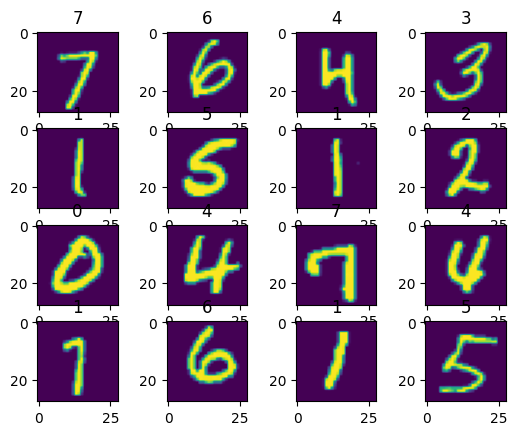

In [12]:
fig, axes = plt.subplots(4,4)
xx, yy = 0, 0
for i,xbatch in enumerate(train_dataloader):
    #print(xbatch.shape)
    for j in range(batch_size):
        image = xbatch['image'][j]
        #print(len(xbatch['label']), xbatch['label'][j].shape)
        label = list(map(lambda xx: xx.item(), xbatch['label'][j]))
        #print(label)
        label = label.index(1)
        axes[xx,yy].imshow(image)
        axes[xx,yy].set_title(str(int(label))) 
        yy += 1
        if yy == 4:
            xx += 1
            yy = 0
    break

plt.show()

In [13]:
import torch.nn as nn
import torch.nn.functional as F 

class CNNmodel(nn.Module):
    def __init__(self):
        super(CNNmodel, self).__init__()
        self.input_layer = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=(3,3),stride=(1,1))
        self.maxpool_1 = nn.MaxPool2d(kernel_size = (2, 2), stride=(2, 2))
        self.conv2d_2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=(3,3),stride=(1,1))
        self.maxpool_2 = nn.MaxPool2d(kernel_size = (2, 2), stride=(2, 2))
        self.flatten = nn.Flatten()
        self.dense1 = nn.Linear(in_features=800, out_features=10) 
    
    def forward(self, x):
        x1 = self.conv2d_2(self.maxpool_1(self.input_layer(x)))
        x1 = F.sigmoid(self.dense1(self.flatten(self.maxpool_2(x1))))
        return x1

In [14]:
my_model = CNNmodel()
from torchsummary import summary
summary(my_model, (1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             160
         MaxPool2d-2           [-1, 16, 13, 13]               0
            Conv2d-3           [-1, 32, 11, 11]           4,640
         MaxPool2d-4             [-1, 32, 5, 5]               0
           Flatten-5                  [-1, 800]               0
            Linear-6                   [-1, 10]           8,010
Total params: 12,810
Trainable params: 12,810
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.14
Params size (MB): 0.05
Estimated Total Size (MB): 0.20
----------------------------------------------------------------


C:\Users\Admin\Desktop\CNRenv\lib\site-packages\torch\nn\functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [15]:
def evaluator(model, dataloader):
    correct = 0
    incorrect = 0
    for i_batch, data in enumerate(dataloader):
        features, target = data['features'], data['targets'].detach().numpy()
        batch_output = model(features)
        for idx in range(batch_size):
            output = batch_output[idx].cpu().detach().numpy()
            op = np.zeros(3, dtype=np.float32)
            op[np.argmax(output)] = 1.0
            #print(output, op, target[idx])
            #print(print(type(target[idx])))
            if np.array_equal(target[idx], op):
                correct += 1
            else:
                incorrect += 1
    print("correct =", correct, "incorrect =", incorrect, "Total =", correct+incorrect)

In [16]:
def get_batched_labels(batch): # shape - Batch_size, array
    batch = batch.numpy()
    #print('batch', batch)
    labels = list(map(lambda xx:np.argmax(xx), batch))
    #print('labels',labels)
    return labels

DEVICE = torch.device('cpu')

In [17]:
class EarlyStopping():
    """
    Early stopping to stop the training when the loss does not improve after
    certain epochs.
    """
    def __init__(self, patience=5, min_delta=0):
        """
        :param patience: how many epochs to wait before stopping when loss is
               not improving
        :param min_delta: minimum difference between new loss and old loss for
               new loss to be considered as an improvement
        """
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
    def __call__(self, val_loss):
        if self.best_loss == None:
            self.best_loss = val_loss
        elif self.best_loss - val_loss > self.min_delta:
            self.best_loss = val_loss
            # reset counter if validation loss improves
            self.counter = 0
        elif self.best_loss - val_loss < self.min_delta:
            self.counter += 1
            print(f"INFO: Early stopping counter {self.counter} of {self.patience}")
            if self.counter >= self.patience:
                print('INFO: Early stopping')
                self.early_stop = True



In [18]:
print(len(val_dataloader))

525


In [19]:
def get_lr(optimizer):
    '''Get Current Learning Rate'''
    for param_group in optimizer.param_groups:
        break
    return param_group['lr']

In [20]:
import sklearn.metrics
from torch.utils.tensorboard import SummaryWriter
import time
import copy

early_stopping = EarlyStopping(patience = 10, min_delta=0.25)
def train(model, epochs, optimizer, lossFunc, lrchanger, accumulation_steps=None):
    print("[INFO] training the net for more ", epochs, "epochs")
    global overall_epoch_count, best_model_wts
    writer = SummaryWriter("./events")
    lowest_val_loss = 100
    actual_labels = []
    #flag_early_stop = False
    #print(early_stopping.early_stop)
    for epoch in range(1, epochs):
        startTime = time.time()
        model.train()
        train_running_loss = 0.0
        val_running_loss = 0.0
        #totalTrainLoss = 0
        #totalValLoss = 0
        len_train = len(train_dataloader)
        len_val = len(val_dataloader)
        #model.zero_grad()
        for i, sample in enumerate(train_dataloader,0):
            #loss = 0
            model.zero_grad() 
            image = torch.unsqueeze(sample['image'], 1)
            #image = sample['image']
            output = sample['label'] 
            #print("mask.shape", mask.shape, "input image shape", image.shape)
            #print(image.shape, output.shape)
            image, output = image.float().to(DEVICE), output.float().to(DEVICE)
            #print(image.shape, output.shape)
            # perform a forward pass and calculate the training loss
            #print(image.shape)
            pred = model(image)
            #mask_pred =  y #y[0,:,:,0] #model(image)[0]
            #print("predicted mask.shape", mask_pred.shape)
            #mask_pred = torch.unsqueeze(mask_pred, 1)
            loss = lossFunc(output, pred)
            loss.backward() 
            train_running_loss += loss.item() * image.size(0)
            #totalTrainLoss += loss.item()          
            optimizer.step()                            # Now we can do an optimizer step
                                      # Reset gradients tensors
     

        with torch.no_grad(): # switch off autograd
            # set the model in evaluation mode
            model.eval()
            # loop over the validation set
            correct, incorrect = 0,0
            predicted_labels = []
            for i, sample in enumerate(val_dataloader,0):
                #loss = 0
                # send the input to the device
                image = torch.unsqueeze(sample['image'], 1)
                output = sample['label'] 
                #mask = sample['label']
                #mask = sample['mask'][0][0]
                image, output = image.float().to(DEVICE), output.float().to(DEVICE)
                #image, mask = image.float().to(DEVICE), mask.float().to(DEVICE)
                pred = model(image)
                if epoch == 1:
                    #print(get_batched_labels(output))
                    actual_labels += get_batched_labels(output)
                #else:
                #    print(len(actual_labels))
                predicted_labels += get_batched_labels(pred)
                #mask_pred =  y[0,:,:,0] 
                #pred = model(image)
                #mask_pred = model(image)
                #mask_pred = torch.unsqueeze(mask_pred, 1)
                loss = lossFunc(pred, output)
                val_running_loss += loss.item() * image.size(0)
                #totalValLoss += loss.item()
       
        print('Total actual labels - {}, Total - predicted labels - {}'.format(len(actual_labels), len(predicted_labels)))
        f1_score = sklearn.metrics.f1_score(actual_labels, predicted_labels,average='micro', zero_division=1)
        print("f1 score", f1_score)
            
                
                
        if lrchanger:
            lrchanger.step()
        # calculate the average training and validation loss
        print("********************************************************************")
        print('EPOCH', epoch, 'time taken =', time.time() - startTime, 'sec')
        avgTrainLoss = train_running_loss/len_train
        avgValLoss = val_running_loss / len_val

        avgTrainLoss = float(avgTrainLoss)
        avgValLoss = float(avgValLoss)
        writer.add_scalar("Loss/train", avgTrainLoss, epoch)
        writer.add_scalar("Loss/val", avgValLoss, epoch)
        early_stopping(avgValLoss)
        print("Train loss: {:.6f}, Val loss: {:.4f}".format(avgTrainLoss, avgValLoss))
        print('Learning Rate', get_lr(optimizer))
        if avgValLoss < lowest_val_loss:
            best_model_wts = copy.deepcopy(model.state_dict())
            lowest_val_loss = avgValLoss
            print('lowest val loss till now at epoch', epoch)

        #overall_epoch_count += 1
        if early_stopping.early_stop:
            print('!!!!!!!!!!!!!!!!!!!EARLY STOPPING!!!!!!!!!!!! at -', epoch)
            break
        #break
    print('Finished Training')
    writer.flush()
    return model


In [21]:
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler

optimizer = optim.SGD(my_model.parameters(), lr=0.01)
print('Initial lr set at optimizer = 0.8')
lrchanger=lr_scheduler.ConstantLR(optimizer, factor=0.95, total_iters=7, last_epoch=-1, verbose=True)
#model_ft = train_model(model, criterion, optimizer, lrchanger, num_epochs=12)
lossFunc = nn.CrossEntropyLoss() #nn.L1Loss()
model_ft = train(model=my_model, epochs=3, optimizer=optimizer, lossFunc=lossFunc, lrchanger=lrchanger)
'''Decays lr by a constant value = 'factor' for ('total_iters' -1 ) number of epochs'''

Initial lr set at optimizer = 0.8
Adjusting learning rate of group 0 to 9.5000e-03.
[INFO] training the net for more  3 epochs
Total actual labels - 8400, Total - predicted labels - 8400
f1 score 0.07214285714285715
Adjusting learning rate of group 0 to 9.5000e-03.
********************************************************************
EPOCH 1 time taken = 8.987961053848267 sec
Train loss: 0.117936, Val loss: 36.8414
Learning Rate 0.0095
lowest val loss till now at epoch 1


C:\Users\Admin\Desktop\CNRenv\lib\site-packages\torch\nn\functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Total actual labels - 8400, Total - predicted labels - 8400
f1 score 0.07214285714285715
Adjusting learning rate of group 0 to 9.5000e-03.
********************************************************************
EPOCH 2 time taken = 9.085702657699585 sec
INFO: Early stopping counter 1 of 10
Train loss: 0.000000, Val loss: 36.8414
Learning Rate 0.0095
Finished Training


"Decays lr by a constant value = 'factor' for ('total_iters' -1 ) number of epochs"